In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [6]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.shape

(5572, 2)

In [8]:
import nltk

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
sent='Hello friends! How are you?'

In [14]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [15]:
from nltk.corpus import stopwords
swords=stopwords.words('english')

In [20]:
clean=[word for word in word_tokenize(sent) if word not in swords]
clean

['Hello', 'friends', '!', 'How', '?']

In [21]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
clean=[ps.stem(word) for word in word_tokenize(sent) if word not in swords]
clean

['hello', 'friend', '!', 'how', '?']

**Creating a single function to perform the above tasks...!**

In [35]:
sent='Hello friends! How are you? We will be learning python today.'

In [33]:
def clean_text(sent):
  tokens=word_tokenize(sent)
  clean=[word for word in tokens if word.isdigit() or word.isalpha()]
  clean=[ps.stem(word) for word in clean if word not in swords]
  return clean


In [36]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer=clean_text)


In [38]:
df.columns


Index(['label', 'text'], dtype='object')

In [40]:
x=df['text']
y=df['label']

In [41]:
x_new=tfidf.fit_transform(x)

In [42]:
x.shape

(5572,)

In [43]:
x_new.shape

(5572, 6513)

In [45]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Imbalance data (above)

<Axes: xlabel='label', ylabel='count'>

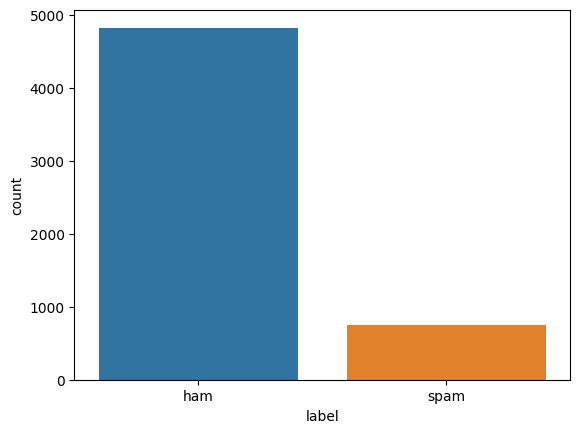

In [49]:
sns.countplot(x=y)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=1)

In [54]:
x_train.shape

(4179, 6513)

In [55]:
y_train.shape

(4179,)

In [56]:
x_test.shape

(1393, 6513)

In [57]:
y_test.shape

(1393,)

In [58]:
from sklearn.naive_bayes import GaussianNB


In [59]:
nb=GaussianNB()

In [60]:
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [61]:
y_pred_nb=nb.predict(x_test.toarray())

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
import matplotlib.pyplot as plt

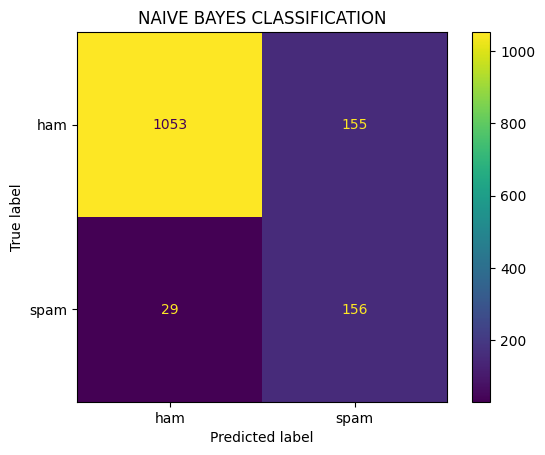

accuracy is :0.867910983488873
              precision    recall  f1-score   support

         ham       0.97      0.87      0.92      1208
        spam       0.50      0.84      0.63       185

    accuracy                           0.87      1393
   macro avg       0.74      0.86      0.77      1393
weighted avg       0.91      0.87      0.88      1393



In [71]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.title('NAIVE BAYES CLASSIFICATION')
plt.show()
print(f"accuracy is :{accuracy_score(y_test,y_pred_nb)}")
print(classification_report(y_test,y_pred_nb))

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [73]:
y_pred_rf=rf.predict(x_test)

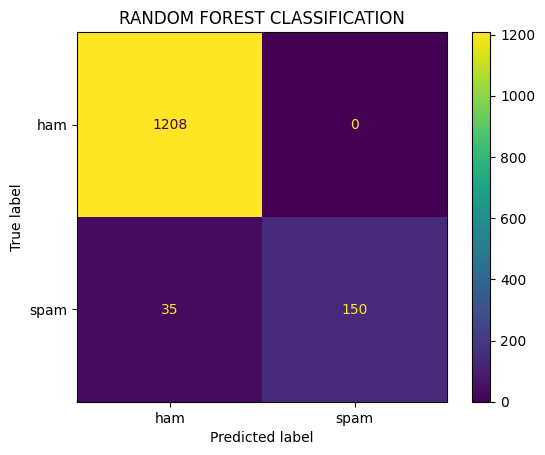

accuracy is :0.9748743718592965
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.81      0.90       185

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.97      0.97      1393



In [76]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('RANDOM FOREST CLASSIFICATION')
plt.show()
print(f"accuracy is :{accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))

In [77]:
from sklearn.model_selection import GridSearchCV


In [78]:
para={
    'criterion':['gini','entropy','log_loss'],
    'class_weight':['balanced','balanced_subsample']
}

In [79]:
gd=GridSearchCV(rf,param_grid=para,cv=5,scoring='accuracy')
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [81]:
rf=gd.best_estimator_

In [82]:
y_pred_gd=rf.predict(x_test)

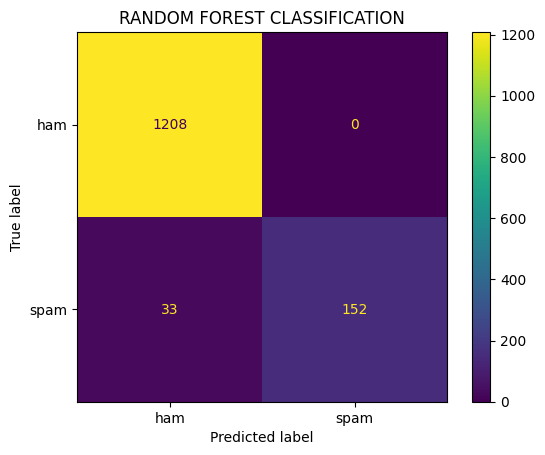

accuracy is :0.9763101220387652
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.82      0.90       185

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393



In [83]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gd)
plt.title('RANDOM FOREST CLASSIFICATION')
plt.show()
print(f"accuracy is :{accuracy_score(y_test,y_pred_gd)}")
print(classification_report(y_test,y_pred_gd))